# QFL Ternary Plotting (Pettijohn, 1977)

This notebook demonstrates how to use this simple module to plot petrographic data on a QFL ternary diagram. The data we will use comes from Bassis et al (2016).

First we need to load the petrographic data using pandas, the data is contained within a file named data.csv and includes data for monocrystalline quartz (Qm), undulose monocrystalline quartz (Qmu), polycrystalline quartz (Qp), plagioclase feldspar (Plag), alkali feldspar (Afsp), lithic fragments (Lf), cement/pseudo matrix (Cem+PM) and pore space (Pore). It also incldes the classification made by the authors  - although they employ the classification scheme of McBride (1963).

Once the data is in we can sum the various quartz types and feldspar types as Q and F respectively, as well as assign the lithic fragment data to the variable L.

In [220]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.path import Path
import matplotlib.patches as patches
%matplotlib inline  

data = pd.read_csv(r'data.csv')
# set classification as index
data_pct = data.set_index('Classification')
# convert counts to percent
data_pct = data_pct.div(data_pct.sum(axis=1), axis=0)*100
# sum quartz types
Q = data_pct['Qm']+data_pct['Qmu']+data_pct['Qp']
F = data_pct['Plag']+data_pct['Afsp']
L = data_pct['Lf']
matrix = data_pct['PM+Cem']
print(data_pct)


                       Qm        Qmu         Qp       Plag       Afsp  \
Classification                                                          
Subarkose       28.000000  21.666667  11.000000   3.333333   7.333333   
Quartz arenite  30.333333  35.666667   0.666667   2.000000   0.000000   
Subarkose       22.000000  51.666667   1.666667   4.333333   1.000000   
Subarkose       42.000000  13.333333   1.000000   4.000000  13.333333   
Subarkose       43.666667  21.333333   1.000000   3.333333   7.666667   
Arkose          44.333333  14.000000   0.333333   0.666667  18.000000   
Arkose          24.666667  24.000000   0.666667   3.333333  21.333333   
Arkose          27.666667  25.000000   1.666667   2.666667  13.000000   
Quartz arenite  30.000000  25.000000   4.333333   0.000000   0.000000   
Quartz arenite  66.666667  26.666667   3.666667   0.000000   0.000000   
Quartz arenite  26.333333  38.333333   0.333333   0.000000   0.000000   
Subarkose       29.333333  37.000000   1.333333   1

Once we have our summed QFL data we need to renormalise these three components to 100%.

In [221]:
top = Q
left = F
right = L

stacked_data = np.vstack((top, left, right))
summed_rows = np.sum(stacked_data[0:], axis=0)
stacked_data = np.vstack((stacked_data, summed_rows))

Q = (stacked_data[0] / stacked_data[3] * 100)
F = (stacked_data[1] / stacked_data[3] * 100)
L = (stacked_data[2] / stacked_data[3] * 100)
dataset = pd.DataFrame({'Q':Q[:10],'F':F[:10],'L':L[:10]})
print (dataset)  

            Q          F    L
0   85.046729  14.953271  0.0
1   97.087379   2.912621  0.0
2   93.388430   6.611570  0.0
3   76.470588  23.529412  0.0
4   85.714286  14.285714  0.0
5   75.862069  24.137931  0.0
6   66.666667  33.333333  0.0
7   77.619048  22.380952  0.0
8  100.000000   0.000000  0.0
9  100.000000   0.000000  0.0


We are then going to transform the QFL data so that it can be plotted on a 2d scatter plot using matplotlibs plt.scatter function - this can be achieved with the following code.

In [232]:
y = Q / 100
x = (1 - F / 100) - (y / 2)
dataset = pd.DataFrame({'x':x[:10],'y':y[:10]}) # make dataframe of first 10 items
print (dataset)

          x         y
0  0.425234  0.850467
1  0.485437  0.970874
2  0.466942  0.933884
3  0.382353  0.764706
4  0.428571  0.857143
5  0.379310  0.758621
6  0.333333  0.666667
7  0.388095  0.776190
8  0.500000  1.000000
9  0.500000  1.000000


We now need to define out fields as polygons to plot on the 2d scatter plot, the QFL coords for each field are given below. We can also initialise the figure and annotate the plot with the polygons.

In [223]:
c1 = ['Quartz arenite', (0.5, 0.9),(0.525, 0.95), (0.5, 1), (0.475, 0.95), (0.5, 0.9)]
c2 = ['Sublitharenite', (0.5, 0.5),(0.625, 0.75), (0.525, 0.95), (0.5, 0.9), (0.5, 0.5)]
c3 = ['Lithic arenite', (1, 0),(0.625, 0.75), (0.5, 0.5), (0.5, 0.0), (1, 0)]
c4 = ['Arkosic arenite', (0, 0),(0.375, 0.75), (0.5, 0.5), (0.5, 0.0), (0, 0)]
c5 = ['Subarkose', (0.5, 0.5),(0.375, 0.75), (0.475, 0.95), (0.5, 0.9), (0.5, 0.5)]
classifications = [c1, c2, c3, c4, c5]

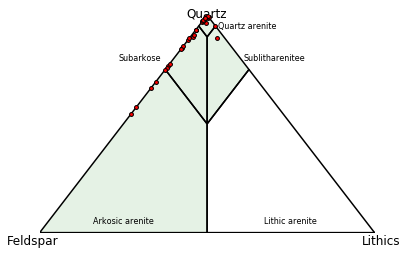

In [233]:
fig, ax = plt.subplots() # create figure and axis
ax.set_frame_on(False)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
# label the apexes of the triangle
ax.text(-0.02, -0.04, "Feldspar", ha="center", va="center", rotation=0, size=12)
ax.text(1.02, -0.04, "Lithics", ha="center", va="center", rotation=0, size=12)
ax.text(0.5, 1.007, "Quartz", ha="center", va="center", rotation=0, size=12)

# add the fields for each petrograpic classification
for i in range(len(classifications)):
    polygon = classifications[i][1:]
    path = Path(polygon)
    # check if every polygon in the loop contains points
    index = path.contains_points(np.column_stack((x, y))) 
    if index.any():
        # if points within change colour to green
        ax.add_patch(patches.PathPatch(path, alpha=0.1, facecolor='green', lw=0, zorder=0)) 
    patch = patches.PathPatch(path, color=None, facecolor=None, fill=False, lw=1.5, zorder=1)
    ax.add_patch(patch)

# label the fields
ax.text(0.62, 0.95, "Quartz arenite", ha="center", va="center", rotation=0, size=8)
ax.text(0.7, 0.8, "Sublitharenitee", ha="center", va="center", rotation=0, size=8)
ax.text(0.75, 0.05, 'Lithic arenite', ha="center", va="center", rotation=0, size=8)
ax.text(0.3, 0.8, "Subarkose", ha="center", va="center", rotation=0, size=8)
ax.text(0.25, 0.05, 'Arkosic arenite', ha="center", va="center", rotation=0, size=8)
# plot the 
ax.scatter(x, y, color='r', s=15, edgecolor='k', zorder=10)

plt.show()

Now we want to be able to add the Pettijohn classification to our datatable so that we can export this and have the classifications alongside the data. We loop over each polygon in turn to determine if points reside within it. Here we also need to use the percentage matrix if we have it so that more clay rich samples can be correctly classified.

In [231]:
final_data = data.copy()
for i in range(len(classifications)):
    polygon = classifications[i][1:]
    path = Path(polygon)
    # check if points are within each polygon  
    # the radius argument allows samples plotting on boundary to be classified
    index = path.contains_points(np.column_stack((x, y)), radius=-0.01) 
    index1 = path.contains_points(np.column_stack((x, y)), radius=0.01)
    for j in range(len(index)):
        if index[j] == True or index1[j] == True:
            final_data.loc[j, "Pettijohn"] = classifications[i][0] # add the classification to the column Pettijohn in the datatable
            if matrix[j] > 15 and  matrix[j] < 75: # change the classification if maxtix > 15% and less <75%
                if classifications[i][0] == 'Sublith Arenite' or classifications[i][0] == 'Lith Arenite':
                    final_data.loc[j, "Pettijohn"] = 'Lithic Wacke'
                elif classifications[i][0] == 'Sub Arkose' or classifications[i][0] == 'Arkosic Arenite':
                    final_data.loc[j, "Pettijohn"] = 'Arkpsic Wacke'
                elif classifications[i][0] == 'Quartz Arenite':
                     final_data.loc[j, "Pettijohn"] = 'Quartz Wacke'
            elif matrix[j] > 75:
                final_data.loc[j, "Pettijohn"] = 'Mudrock'
        else:
            pass
final_data = final_data.set_index('Classification')
print(final_data)

                 Qm  Qmu  Qp  Plag  Afsp  Lf  Pore  PM+Cem        Pettijohn
Classification                                                             
Subarkose        84   65  33    10    22   0    53      33        Subarkose
Quartz arenite   91  107   2     6     0   0    79      15   Quartz arenite
Subarkose        66  155   5    13     3   0    52       6        Subarkose
Subarkose       126   40   3    12    40   0    30      49        Subarkose
Subarkose       131   64   3    10    23   0    58      11        Subarkose
Arkose          133   42   1     2    54   0    46      22        Subarkose
Arkose           74   72   2    10    64   0    28      50  Arkosic arenite
Arkose           83   75   5     8    39   0    39      51        Subarkose
Quartz arenite   90   75  13     0     0   0     5     117   Quartz arenite
Quartz arenite  200   80  11     0     0   0     9       0   Quartz arenite
Quartz arenite   79  115   1     0     0   0    54      51   Quartz arenite
Subarkose   